# Reckitt Business Advisor Data 2019 - 2020
Prepared by CPT6  
Master of Science in Data Science 2021 
Asian Institute of Management

---

*All rights reserved. No part of this document may be reproduced or transmitted in any form or by any means, or stored in any retrieval system of any nature without prior written permission.*

© 2021

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> EXECUTIVE SUMMARY </span></div>

Reckitt's Business Advisor (BA) data is a per day record of sales performance on Lazada and Shoppee, the two main channels that the company is selling IFCN (Infant and Child Nutrition) products on. To maximize insight on the dataset, look for hidden trends, and test underlying assumptions, exploratory data analysis is performed. This is an essential part of data analysis. In this document, several charts and visualizations are shown to present data regarding sales performance per channel, product performance, click rates, etc. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", context="talk")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('BA (1).csv')
df.head()

,date,channel,country,shop_name,sku,product_name,brand,url,sap,cat1,...,cat3,cat4,cat5,cat6,sales,units_sold,product_views,click_rate,buyer,order
0,2019-01-01,Lazada,PH,Lazada Retail Lactum,260013061_PH-358536442,Lactum 3+ Plain Powdered Milk Drink 2kg,Lactum,https://www.lazada.com.ph/products/-i260013061...,2048174.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0,25,0.00,0,0
1,2019-01-01,Lazada,PH,Lazada Retail Lactum,267657810_PH-379353311,Lactum 3+ Plain Powdered Milk Drink 1.6Kg with...,Lactum,https://www.lazada.com.ph/products/-i267657810...,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,10,116,8.62,10,10
2,2019-01-01,Lazada,PH,Lazada Retail Lactum,267665603_PH-379348476,Lactum 3+ Plain Powdered Milk Drink 1.2Kg with...,Lactum,https://www.lazada.com.ph/products/-i267665603...,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,1,27,3.70,1,1
3,2019-01-01,Lazada,PH,Lazada Retail Lactum,267669546_PH-379343854,Lactum 3+ Plain Powdered Milk Drink 150g,Lactum,https://www.lazada.com.ph/products/-i267669546...,2020877.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0,62,0.00,0,0
4,2019-01-01,Lazada,PH,Lazada Retail Lactum,DELETE,2 Packs Of Lactum 3+ Plain Powdered Milk Drink...,Lactum,https://www.lazada.com.ph/products/-i267671509...,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,17,298,5.70,14,14


<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> EXPLORATORY DATA ANALYSIS </span></div>

## Comparing 2019 & 2020 

### 1. Sales

A comparison between the 2019 and 2020 sales are checked to show trends and to check how channels are performing. In this step, `Lazada` and `Shoppee` sales are aggregated for each year. Note that only IFCN products (Enfa, Lactum, and Sustagen),

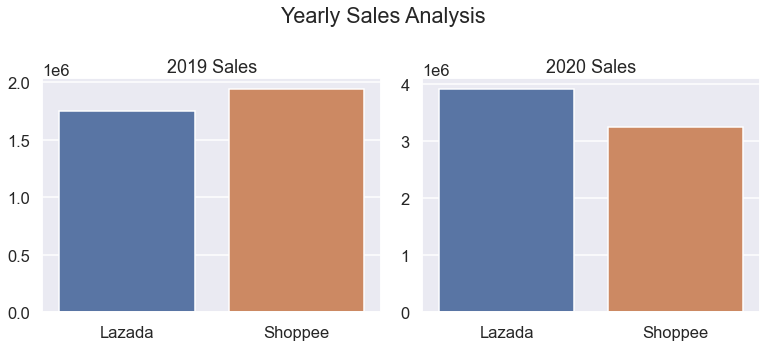

In [3]:
df_2019 = df.loc[df['date'] <= '2019-12-31']
df_2020 = df.loc[df['date'] > '2019-12-31']

sales_2019 = df_2019.groupby('channel')['sales'].sum()
sales_2020 = df_2020.groupby('channel')['sales'].sum()

channel = ['Lazada', 'Shoppee']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5), sharex=True)
sns.barplot(x=channel, y=sales_2019.values, data = df_2019, ax=ax1)
ax1.set_title('2019 Sales')
sns.barplot(x=channel, y=sales_2020.values, data = df_2020, ax=ax2)
ax2.set_title('2020 Sales')


f.suptitle('Yearly Sales Analysis')
plt.tight_layout()
plt.show()

For 2019 and 2020, there isn't a wide discrepancy between the sales of Lazada and Shoppee. What can be observed however is that sales for both year differ by a wide margin, with 2020 showing sales of almost 4 million for Lazada. This can be attributed to the pandemic and the rise of e-commerce. 

As to which channel performs better, from the data, it can be inferred that both channels performs just as well as the other. So, marketing efforts should be equally focused on Lazada and Shoppee. 

### 2. Transactions

Comparisons are made for each year for transactions made in Lazada and Shoppee have an overview of how much orders and, to some extent, how much customers are spending on each platform.

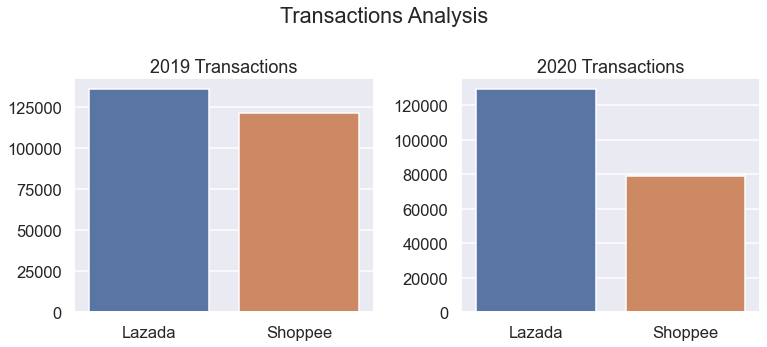

In [4]:
transactions_2019 = df_2019.groupby('channel')['units_sold'].sum()
transactions_2020 = df_2020.groupby('channel')['units_sold'].sum()

channel = ['Lazada', 'Shoppee']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5), sharex=True)
sns.barplot(x=channel, y=transactions_2019.values, data = df_2019, ax=ax1)
ax1.set_title('2019 Transactions')
sns.barplot(x=channel, y=transactions_2020.values, data = df_2020, ax=ax2)
ax2.set_title('2020 Transactions')

f.suptitle('Transactions Analysis')
plt.tight_layout()
plt.show()

Corroborating with the `Sales` data in the previous item, it can be inferred that though there are many transactions in `Lazada` than in Shoppee, people spent much more money per transaction in Shoppee. One hypothesis could be more people bought more promo items in Lazada (Buy 1 take 1) which were cheaper and bought regular prized items in Shoppee.

### 3. Sales Per Month
An analysis of monthly sales was done to show trends per month. This could give an insight on how the channels perform for each month and might give an idea on when to push for marketing efforts depending on a certain month.

In [5]:
df_2019['date'] = pd.to_datetime(df_2019['date'])
df_2020['date'] = pd.to_datetime(df_2020['date'])

month_2019 = (df_2019.groupby(df_2019['date']
                              .dt.strftime('%B'))['sales']
              .sum().sort_values())

month_2020 = (df_2020.groupby(df_2020['date']
                              .dt.strftime('%B'))['sales']
              .sum().sort_values())

month_2019.index = pd.CategoricalIndex(month_2019.index, 
                                       categories=['January', 'February', 
                                                       'March', 'April','May',
                                                       'June', 'July', 
                                                       'August','September', 
                                                       'October', 'November',
                                                       'December'], 
                               ordered=True)

month_2020.index  = pd.CategoricalIndex(month_2020.index, 
                                        categories=['January', 'February', 
                                                       'March', 'April','May',
                                                       'June', 'July', 
                                                       'August','September', 
                                                       'October', 'November',
                                                       'December'], 
                               ordered=True)

month_2019 = month_2019.sort_index()
month_2020 = month_2020.sort_index()

month_2019 = month_2019.reset_index()
month_2020 = month_2020.reset_index()

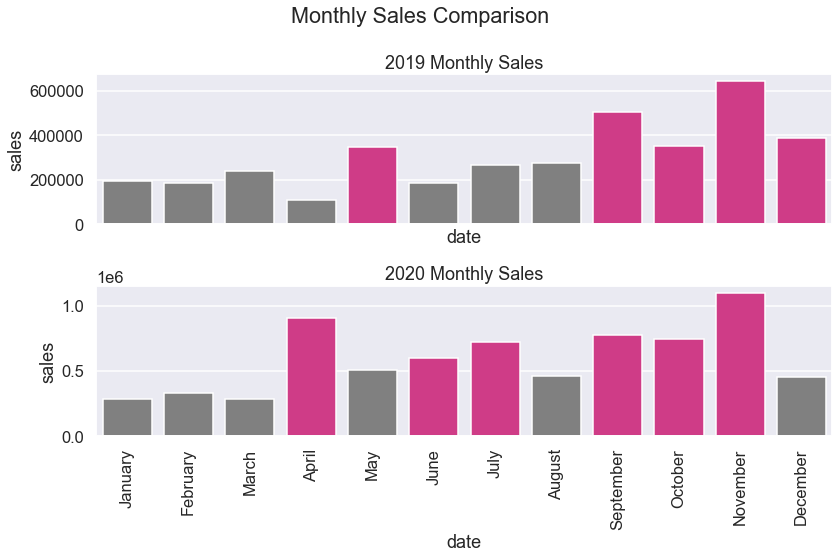

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

clrs1 = ['grey' if (x < month_2019.sales.mean()) else 
        '#E72388' for x in month_2019.sales]

sns.barplot(x='date', y='sales', data = month_2019, palette=clrs1, ax=ax1)
ax1.set_title('2019 Monthly Sales')

clrs2 = ['grey' if (x < month_2020.sales.mean()) else 
        '#E72388' for x in month_2020.sales]

sns.barplot(x='date', y='sales', data = month_2020, palette=clrs2, ax=ax2)
ax2.set_title('2020 Monthly Sales')

f.suptitle('Monthly Sales Comparison')

plt.xticks(rotation=90)
plt.tight_layout();

For the purposes of this analysis, months that exceeded the average for the whole year were considered as months with high sales and were represented with a different color. Overall, there were more sales in 2020 than in 2019. Also, it can be observed that for both years, there were months that didn't have high sales in one year, but in the next were notably high. A case in point would be April 2020. This could be attributed to the behavior of people one month after the lockdown. Because of the lockdown, people were unable to go out to buy their goods. Thus, it could be inferred that they turned to online shopping, which showed in the analysis above. November has always been high assumingly because of 11.11 campaigns.

### 4. Brand Sales Performance
An analysis on Enfa, Lactum, and Sustagen is done to see which products are dominating both channels. Aggregated analysis was done first for both years, then a per channel analysis is done. 

In [7]:
df1 = df.copy()
df1['brand'] = df1.brand.replace({'Enfagrow': 'Enfa', 'Enfamama': 'Enfa', 
                         'Enfamil': 'Enfa', 'Sustagen Premium': 'Sustagen'})

brand_2019 = df1.loc[df1['date'] <= '2019-12-31']
brand_2020 = df1.loc[df1['date'] > '2019-12-31']

brand_2019 = brand_2019.groupby('brand')['sales'].sum()
brand_2020 = brand_2020.groupby('brand')['sales'].sum()

In [8]:
labels = ['Enfa', 'Lactum', 'Sustagen']
colors = ['#476C9B', '#FF495C', '#775253']

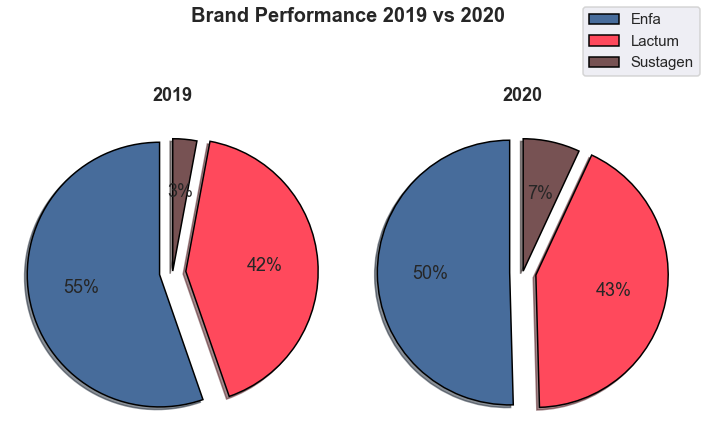

In [9]:
explode = (0.1, 0.1, 0.01)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.pie(brand_2019.values, startangle=90, explode = explode,
            wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True,
       colors=colors);
ax1.set_title('2019', fontweight='bold')

ax2.pie(brand_2020.values, startangle=90, explode = explode,
            wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True, 
        colors=colors);
ax2.set_title('2020', fontweight='bold')

f.suptitle('Brand Performance 2019 vs 2020', fontsize=20, y=1.07, 
             fontweight='bold', x=0.5)
f.legend(labels=labels, fontsize='small')
f.tight_layout();

Enfa has the largest market share for both years in both platforms, with at least 50% of the products sold are Enfa. Sustagen has increased its percentage to 7% from 3%, but it is still small compared to the other brands. Maybe more marketing efforts should be put in place for Sustagen.

In [10]:
lazada_brand = df1[df1['channel']=='Lazada']
shopee_brand = df1[df1['channel'] == 'Shopee']

laz_2019 = lazada_brand.loc[lazada_brand['date'] <= '2019-12-31']
laz_2020 = lazada_brand.loc[lazada_brand['date'] > '2019-12-31']

laz_2019 = laz_2019.groupby('brand')['sales'].sum()
laz_2020 = laz_2020.groupby('brand')['sales'].sum()

shop_2019 = shopee_brand.loc[shopee_brand['date'] <= '2019-12-31']
shop_2020 = shopee_brand.loc[shopee_brand['date'] > '2019-12-31']

shop_2019 = shop_2019.groupby('brand')['sales'].sum()
shop_2020 = shop_2020.groupby('brand')['sales'].sum()

In [11]:
laz_colors = ['#bbe1fa', '#3282b8', '#0f4c75']
shopee_colors = ['#f9e0ae', '#e27802', '#6a492b']

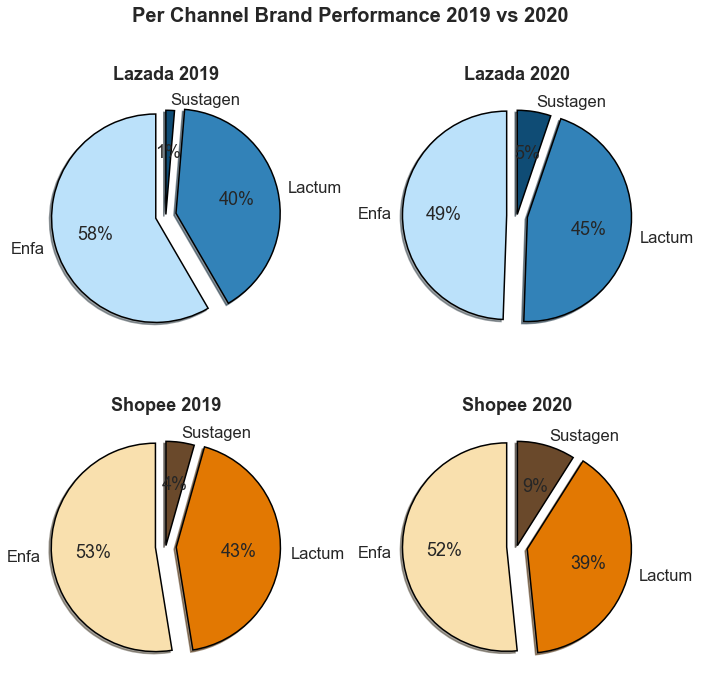

In [12]:
explode = (0.1, 0.1, 0.01)

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0,0].pie(laz_2019.values, startangle=90, explode = explode,
            wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True,
       colors=laz_colors, labels=labels);
ax[0,0].set_title('Lazada 2019', fontweight='bold')

ax[0,1].pie(laz_2020.values, startangle=90, explode = explode,
            wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True, 
        colors=laz_colors, labels=labels);
ax[0,1].set_title('Lazada 2020', fontweight='bold')

ax[1,0].pie(shop_2019.values, startangle=90, explode = explode,
            wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True,
       colors=shopee_colors, labels=labels);
ax[1,0].set_title('Shopee 2019', fontweight='bold')

ax[1,1].pie(shop_2020.values, startangle=90, explode = explode,
            wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True, 
        colors=shopee_colors, labels=labels);
ax[1,1].set_title('Shopee 2020', fontweight='bold')


f.suptitle('Per Channel Brand Performance 2019 vs 2020', fontsize=20, 
             fontweight='bold', x=0.5)
f.tight_layout();

The same trends appear for each channel wherein Enfa dominated all of it. One observation we can see however is that in 2020, Enfa's market share on Lazada seemed to have faltered by at least 9% from 2019, whereas lactum grew by as much as 5%. No notable conclusions can be done from that observation except that perhaps there were more marketing efforts for Lactum such that the public might have bought more of it. An analysis of other data must be done to get more insights as to why this happened. However, the decline of Enfa in Lazada for 2020 is still worth noting when in Shopee, it maintained its' performance for both years. 

### 5. Top Products Per Channel (Aggregated)

Based on the available data, an analysis is performed to see which products can be considered 'best-sellers' and what their sales performances are for 2019 and 2020. 

In [13]:
df_all = df.groupby('product_name')['sales'].sum().reset_index()

prods_2019 = df_2019.groupby('product_name')['sales'].sum().reset_index()
prods_2019.columns = ['product_name', 'sales_2019']

prods_2020 = df_2020.groupby('product_name')['sales'].sum().reset_index()
prods_2020.columns = ['product_name', 'sales_2020']

new_df = df_all.merge(prods_2019, how='right')
new_df = new_df.merge(prods_2020, how='right')

top_prods = new_df.sort_values('sales', ascending=False)[:10]

Text(0.1, 1.0, 'Sales Performance of Top 10 Products')

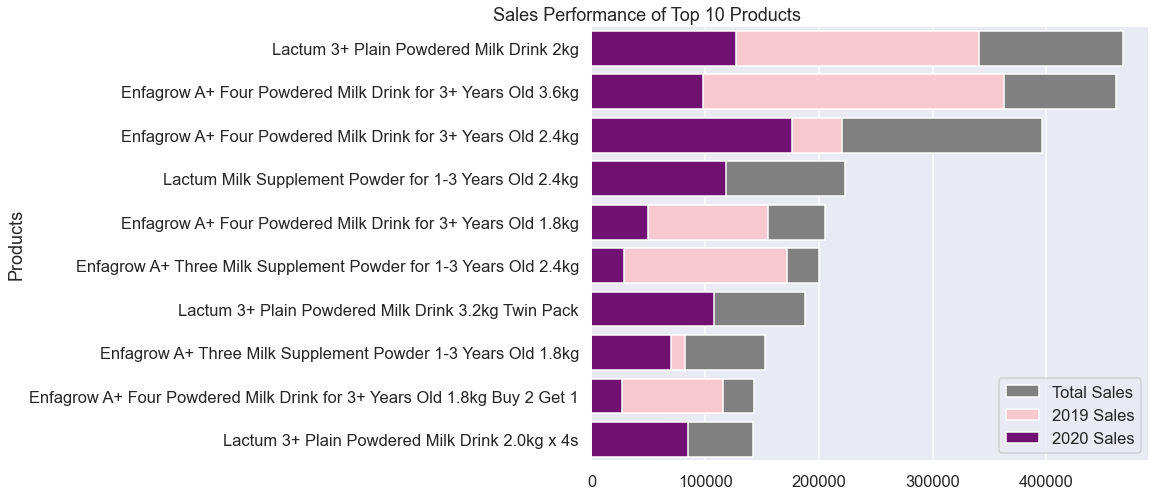

In [14]:
plt.figure(figsize=(10, 8))
sns.set_color_codes("muted")
sns.barplot(x='sales', y='product_name', data=top_prods, color='gray', 
            label='Total Sales')

sns.set_color_codes("muted")
sns.barplot(x="sales_2019", y="product_name", data=top_prods,
            label="2019 Sales", color="pink")

sns.set_color_codes("muted")
sns.barplot(x="sales_2020", y="product_name", data=top_prods,
            label="2020 Sales", color="purple")

plt.legend(ncol=1, loc="lower right", frameon=True)
plt.xlabel("")
plt.ylabel('Products')
plt.title('Sales Performance of Top 10 Products', x=0.1)

Shown here are the Top 10 products (in terms of sales, aggregated for both channels) and their sales performance for 2019 and 2020 compared to their total sales. It can be observed that the these products have performed well on 2019 compared to 2020.  